##  <span style= "color:blue">IEE065 - Análise de Sobrevivência e Confiabilidade
#### Aluno: João Claudio da Silva Araujo Lobato
##### Amazoneida Sá Peixoto Pinheiro - Professora Associada do Depto. Estatística - UFAM
### Aula 04: Tópico II: Funções Básicas de Sobrevivência
#### Data: 20/01/2022

* Nesta aula iremos definir e interpretar as funções de sobrevivência: Função de sobrevivência, Função de Falha, Função de Risco ou Taxa de falha e Risco Acumulado.

 ### <span style= "color:red"> 1. Função de Densidade de Probabilidade

* Definimos a variável $T$ - o tempo de sobrevivência, o tempo até a ocorrência de um evento de interesse. 
* Considere T uma v.a contínua ou discreta, não negativa, $T \geq 0$, com função de densidade $f(t)$.
* No contexto da ASC, a função $f(t)$ pode ser interpretada como a probabilidade de um indivíduo sofrer um evento em um intervalo instantâneo de tempo, onde $\epsilon$ é o incremento de tempo infinitamente pequeno

## $f(t) = lim_{\epsilon-> 0}\frac{P(t \leq T \leq t+ \epsilon)}{\epsilon}$

* se não houver censura, se todos os pacientes apresentarem o evento antes do fim do estudo, a função pode ser a partir dos tempos em que ocorreram os eventos.

* EXEMPLO: Suponha que 32 pacientes diagnosticados com AIDS foram acompanhados ao longo do tempo e todos faleceram antes do fim do estudo

In [4]:
# Tempo de sobrevivência (em dias)
Dias<-c(3,18, 29, 54, 60, 84, 110, 112, 116, 123, 134, 145, 151, 151, 158, 173, 194, 214, 329, 331, 371, 408, 490, 514, 541, 555, 688, 780, 801, 858, 887, 998)

In [4]:
Dias

[1]   3  18  29  54  60  84 110 112 116 123 134 145 151 151 158 173 194 214 329
[20] 331 371 408 490 514 541 555 688 780 801 858 887 998

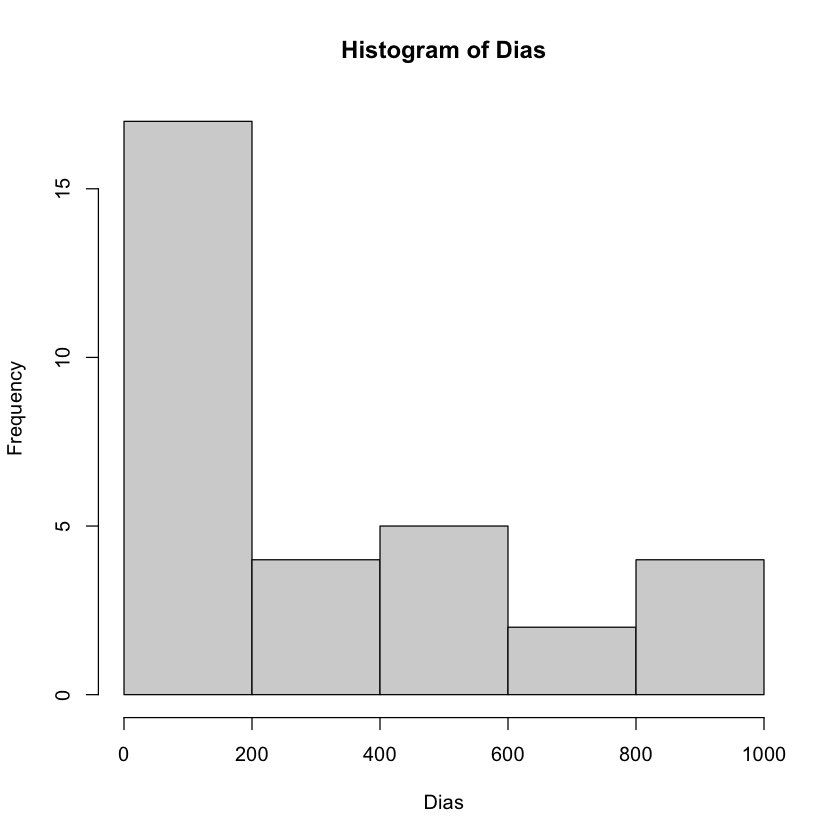

In [33]:
hist(Dias)


* Os Tempos de vida muitas vezes são descritos por densidades assimétricas, como sugereo o Histograma 

* O valor obs para T - o momento de um ou mais eventos - está relacionado à amplitude do intervalo x entre o evento anterior e o atual,calculando -se a estimação empírica:

### $\hat{f}_x(t)=\frac{N_x(t)}{(No \ Total \ de \ ocorrências)*\Delta_x}$

Onde:
    x: é o índice do intervalo: 1,2,3,... e
    
  $N_x(t) $: é o No. de ocorrências no intervalo de tempo $x \ e \Delta_x$
  
**OBS: A prob de ocorrência do evento permanece constante dentro do intervalo de tempo entre o evento anterior e atual**

| Intervalo 	| Rx(t) 	| Nx(t) 	| Ampl.Int 	    |$\hat{f_x}(t)$|
|--------------	|----------	|----------	|--------------	|---------	|
| (0,3]     	| 32    	| 1     	| 3         	| 0.01042 	| 
| (3,18]    	| 31    	| 1     	| 15        	| 0.00208 	| 
| (18,29]   	| 30    	| 1     	| 11        	| 0.00284 	| 
| (29,54]   	| 29    	| 1     	| 25        	| 0.00125 	| 

Exercício: Preencha a tabela

In [2]:
Nx<-c(1,1,1,1,1,1,1,1,1,1,1,1,2,1,1)

In [3]:
Ampl<-c(3,15,11,25,6,24,2,4,7,11,6,7,15)


In [9]:
Rx<-c(32,31,30,29,28,27,26,25,24,23,22,21,20,18,17)

In [14]:
N<-32
for (i in 1:15){
   ft[i]<- Nx[i]/(32*Ampl[i])  
}

ft

[1] 0.010416667 0.002083333 0.002840909 0.001250000 0.005208333 0.001302083
 [7] 0.015625000 0.007812500 0.004464286 0.002840909 0.005208333 0.004464286
[13] 0.004166667          NA          NA

### <span style= "color:red"> 2. Função de Sobrevivência

* Poderemos responder:

Qual a prob de um ind. com AIDS sobreviver por mais de 365 dias? Isto é qual a prob. de T ser maior que um determinado valor $t=365$? Formalmente:

 ### $S(t) = P(T > t)=1-F(t)$
 
 ### $F(t)=\bar{S(t)} = 1 - S(t) = P(T \leq t)$
 
 $F(t)$ é a Função de Distribuição acumulada da v.a T, logo $S(t)$ é o complemento de $F(t)$, é definida como a Prob. do ind. não sobreviver ao tempo t.
 
### Característica de S(t):
   * $S(0)=1$
   * É uma função não crescente;
   * $ t -> \infty; S(\infty)=0$
     
###  $\hat{S(t)}=\frac{R_x(t)}{No. \ Total \ de \ indivíduos}$

Onde $R_x(t):$ No. de indivíduos sob risco no início do intervalo

Exemplo: 

### $\hat{S}_{(18,29]}(t)=\frac{R_{(18,29]}(t)}{32}=\frac{30}{32}=0.93750$

    * Assim, A prob. de ind. sobrever por mais de 18 dias é:
    
$\hat{S}(18) = \hat{P}(T > 18)= 0.93750$
    

In [18]:
st<-0
for (i in 1:15){
    st[i]<-Rx[i]/32
}
st

[1] 1.00000 0.96875 0.93750 0.90625 0.87500 0.84375 0.81250 0.78125 0.75000
[10] 0.71875 0.68750 0.65625 0.62500 0.56250 0.53125

In [7]:
length(Dias)

[1] 32

In [3]:
status<-c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

In [12]:
length(status)

[1] 32

In [5]:
require(survival)
Surv(Dias,status)

Loading required package: survival



 [1]   3  18  29  54  60  84 110 112 116 123 134 145 151 151 158 173 194 214 329
[20] 331 371 408 490 514 541 555 688 780 801 858 887 998

In [6]:
# Estimação da função de Sobrevivência, usando a função survfit do R pacote Survival
St<- survfit(Surv(Dias,status) ~ 1)

In [27]:
summary(St)

Call: survfit(formula = Surv(Dias, status) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    3     32       1   0.9688  0.0308      0.91030        1.000
   18     31       1   0.9375  0.0428      0.85727        1.000
   29     30       1   0.9062  0.0515      0.81068        1.000
   54     29       1   0.8750  0.0585      0.76760        0.997
   60     28       1   0.8438  0.0642      0.72688        0.979
   84     27       1   0.8125  0.0690      0.68792        0.960
  110     26       1   0.7812  0.0731      0.65038        0.938
  112     25       1   0.7500  0.0765      0.61402        0.916
  116     24       1   0.7188  0.0795      0.57870        0.893
  123     23       1   0.6875  0.0819      0.54428        0.868
  134     22       1   0.6562  0.0840      0.51070        0.843
  145     21       1   0.6250  0.0856      0.47789        0.817
  151     20       2   0.5625  0.0877      0.41440        0.764
  158     18       1   0.5312  0.0882      0.38367     

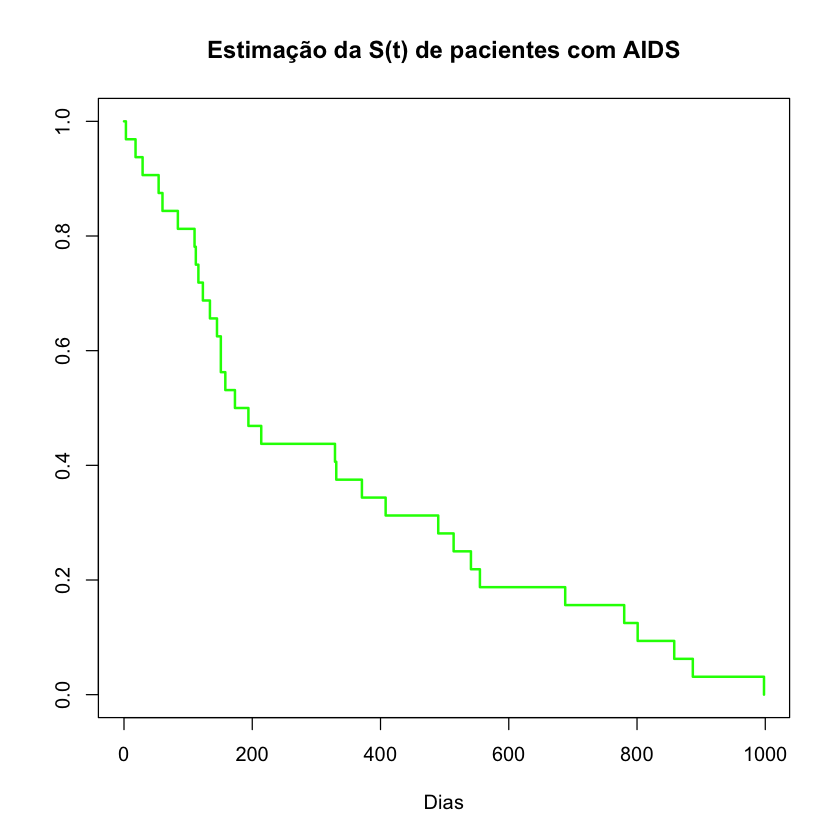

In [7]:

plot(St,col="green", lwd=2, main="Estimação da S(t) de pacientes com AIDS", xlab="Dias",conf.int=F)

| Intervalo 	| Rx(t) 	| Nx(t) 	| Ampl.Int 	    |$\hat{f_x}(t)|$|$\hat{S_x}(t)$|
|--------------	|----------	|----------	|--------------	|---------	|------------------|
| (0,3]     	| 32    	| 1     	| 3         	| 0.01042 	| 1.00             |
| (3,18]    	| 31    	| 1     	| 15        	| 0.00208 	| 0.96875          |
| (18,29]   	| 30    	| 1     	| 11        	| 0.00284 	| 0.93750          |
| (29,54]   	| 29    	| 1     	| 25        	| 0.00125 	| 0.90625          |



### <span style= "color:red"> 3. Função de Risco(hazard)  ou Taxa de Falha

* Poderemos responder:

* Qual é o risco de um ind. vir a óbito após sobreviver 365 dias? Este risco aumento ou   diminui com o tempo?

* λ(t) → probabilidade instantânea de um indivíduo sofrer o evento em um intervalo de tempo t e (t + ε) dado que ele sobreviveu atéo tempo t.

* Sendo ε infinitamente pequeno, λ(t) expressa o risco instantâneo de ocorrência de um evento, dado que até então o evento não tenha ocorrido.

* Vamos agora redefinir o intervalo como $(t, t + ∆t=\epsilon]$:
 
    * Taxa de falha instantânea em t condicional à sobrevivência até o tempo t. Vamos     fazer ∆t =$\epsilon$→ 0.

    * A funçãao de taxa de falha de T é então definida por:

### $\lambda(t) = lim_{\epsilon ->\infty} \frac{P[(t\leq T < t+  \epsilon)| T\geq t]}{\epsilon}$

**Obs: Esta função não é uma probabilidade, apesar de usar o nome Risco**, é uma taxa e pode assumir qualquer valor positivo.

### $\lambda(t) = \frac{f(t)}{S(t)}= -\frac{d  ln(S(t))}{dt}=\frac{f(t)}{1-F(t)}$

* Sobrevivência e risco são inversamente proporcionais: quando o risco aumenta, a probabilidade de sobrevivência diminui e vice-versa.

### $\hat{\lambda}(t) = \frac{N_x(t)}{R_x(t)*\Delta_x}$

    * A função de taxa de falha λ(t) é bastante útil para descrever a distribuição de tempos de vida em pacientes - descreve a forma em que a taxa instantânea de falha muda com o tempo.
    
    * A curva da taxa de falha pode ter comportamento gráfico diverso, podem ser crescente, decrescente, constante, monótonas e não monótonas. Entraremos em mais detalhes, no assunto dos Modelos probabilísticos de Sobrevivência.
    
   * Abaixo a curva da banheira que pode descrever a taxa de falha sistema de vida do Homo sapiens.

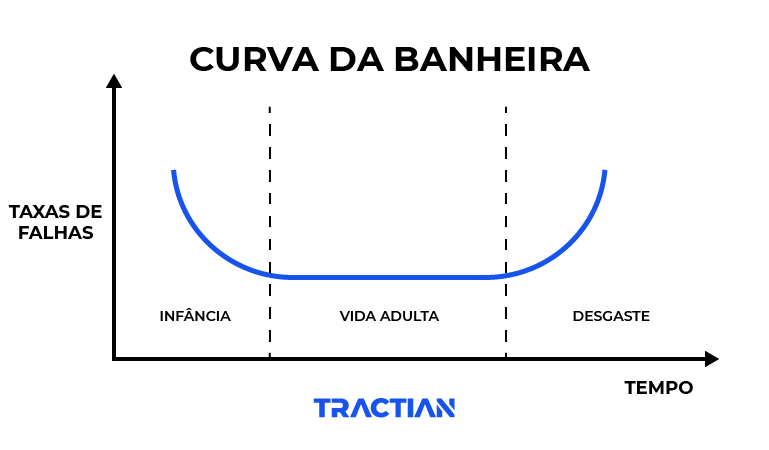

### <span style= "color:red"> 4. Função de Risco Acumulada  ou Taxa de Falha Acumulada

* Qual o risco de um indivíduo vir a óbito em seus primeiros 20 anos de vida?

* Qual o risco de um paciente com AIDS vir a óbito no primeiro ano após odiagnóstico?
 
* $H(t)$ - função de risco acumulado mede o risco de morte até o tempo t

### $H(t)= - ln(S(t))= \int_0 ^t \lambda(u)du$

| Intervalo 	| Rx(t) 	| Nx(t) 	| Ampl.Int 	    |$\hat{f_x}(t)|$|$\hat{S_x}(t)$| $\lambda(t)$|
|--------------	|----------	|----------	|--------------	|---------	|------------------|-------------|
| (0,3]     	| 32    	| 1     	| 3         	| 0.01042 	| 1.00             |
| (3,18]    	| 31    	| 1     	| 15        	| 0.00208 	| 0.96875          |
| (18,29]   	| 30    	| 1     	| 11        	| 0.00284 	| 0.93750          |
| (29,54]   	| 29    	| 1     	| 25        	| 0.00125 	| 0.90625          |





Exercício-II: Encontrar estimativas f(t), S(t), Taxa de falha e taxa de falha acumulada. Fazer o Gráfico para cada função